### **ANÁLISE EXPLORATÓRIA HSL -  Exames COVID**

### Data: 12/04/2024

#### Filipe Loyola Lopes

In [402]:
#Bibliotecas

import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
from numpy import mean
from numpy import std
from numpy import correlate
from numpy.random import randn
from numpy.random import seed
import matplotlib.pyplot as plt
#plt.style.use('default')
#%matplotlib inline
import seaborn as sns
#import pandas_profiling
#from google.colab import files
import seaborn as sns
import warnings
import datetime as dt
from datetime import date
import os

  # 0.0 - INTEGRAÇÃO DE DADOS





















In [403]:
# Checks the existence of the file and, if necessary, goes to the correct directory
verifica_arquivo = os.path.exists("Datasets")
if verifica_arquivo == False:
    %cd /home/filipe/Documentos/GitHub/HCAI_prediction
    %ls

/home/filipe/Documentos/GitHub/HCAI_prediction
agrupado.xlsx         describe.xlsx  mainNotebook.ipynb        README.md
DatasetConstruction/  df_covid.xlsx  pacientes_negativos.xlsx
Datasets/             LICENSE        pacientes_positivos.xlsx


DATASET HSL_PACIENTES

In [404]:
# arquivo "HSL_Pacientes_3.csv" referente a janeiro 2021
df_pacientes = pd.read_csv('Datasets/HSL_Pacientes_4.csv', sep='|')
print(df_pacientes.shape)
df_pacientes.head(3)

(14673, 7)


,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO
0,CFF55DA6AFD2DBF06851795AB62AD6CD,M,1970,BR,SP,SAO PAULO,CCCC
1,E992F42A89FA4E7CE49E9533F14E0268,M,1939,BR,SP,SAO PAULO,CCCC
2,CC0CAC7E6F8DBC8EE4D3C409D18ACD6F,M,1960,BR,SP,SAO PAULO,CCCC


In [405]:
#verificando quantidade de pacientes unicos
df_pacientes['ID_PACIENTE'].nunique()

14673

DATASET HSL_EXAMES

In [406]:
# arquivo "HSL_Exames_4.csv"
df_sirio_libanes = pd.read_csv('Datasets/HSL_Exames_4.csv', sep='|')
print(df_sirio_libanes.shape)
df_sirio_libanes.head(2)

(2952999, 9)


,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,22/01/2021,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,ng/dL,Ver resultado tradicional
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,24/09/2020,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,ng/dL,Ver resultado tradicional


In [407]:
#Eliminando exemplos repetidos
df_sirio_libanes = df_sirio_libanes.drop_duplicates()
df_sirio_libanes.shape

(2899573, 9)

In [408]:
#verificando analitos unicos
df_sirio_libanes['DE_ANALITO'].nunique()

1089

Criando coluna Exame.Analito

In [409]:
df_sirio_libanes["Exame.Analito"] = df_sirio_libanes["DE_EXAME"]+"."+df_sirio_libanes["DE_ANALITO"]

df_sirio_libanes.head(2)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,Exame.Analito
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,22/01/2021,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,ng/dL,Ver resultado tradicional,17 Hidroxipregnenolona.17-Hidroxi Pregnenolona
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,24/09/2020,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,ng/dL,Ver resultado tradicional,17 Hidroxipregnenolona.17-Hidroxi Pregnenolona


## Obtendo lista de exames relacionados a COVID-19

In [410]:
!pip install 'openpyxl>=3.0.0'

Defaulting to user installation because normal site-packages is not writeable


In [411]:
df_exames = pd.read_excel('DatasetConstruction/exames_COVID19_todos.xlsx', sheet_name='lista_exames')
print(df_exames.shape)
df_exames.head(22)

(17, 1)


,Exame.Analito
0,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."
1,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."
2,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."
3,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."
4,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."
5,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."
6,"COVID-19-PCR para SARS-COV-2, Vários Materiais..."
7,"COVID-19-PCR para SARS-COV-2, Vários Materiais..."
8,COVID-19-Sorologia IgM e IgG por quimiluminesc...
9,"COVID-19-Teste Rápido (IgM e IgG), soro.Covid ..."


In [412]:
list_exames = df_exames['Exame.Analito'].values.tolist()

print(list_exames)

print( len(list_exames) )

['COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA', 'COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação', 'COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação', 'COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG', 'COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação', 'COVID-19, anticorpos IGA e IGG, soro.Covid 19, observação', 'COVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)', 'COVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Material (2019-nCoV) ', 'COVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice', 'COVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ', 'COVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido', 'COVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgM, teste rápido', 'COVID-19-Teste Rápido (IgM e IgG), sor

In [413]:
df_exames = df_sirio_libanes.loc[ df_sirio_libanes['Exame.Analito'].isin(list_exames) ]

df_exames.shape

(20960, 10)

Verificando quantos pacientes únicos fizeram esses exames específicos

In [414]:
df_exames['ID_PACIENTE'].nunique()

14673

Verificando o número de ocorrência de cada exame

In [415]:
exames = df_exames.groupby( ['Exame.Analito'] )

occur =exames.size()

occur

Exame.Analito
COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA                                                                              5
COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação                                                         5
COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação                                                               5
COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG                                                                              5
COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação                                                               5
COVID-19, anticorpos IGA e IGG, soro.Covid 19, observação                                                                                  5
COVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)                                                         8200

In [416]:
filtro = (df_exames['Exame.Analito'] == 'COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA')

df_exames[filtro]

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,Exame.Analito
302308,6F0A6A0E0839924AD125035171DD456F,8868FDC3A0E8F33E56A81745A733E82B,17/04/2020,UTI,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,13",-,"inferior a 0,80","COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."
302309,BDB4D02CACAC3F8DCF8E2E0B315E2711,608B18473525F6D2603F1453E8BA697A,07/04/2020,Recepção do Centro Diagnóstico,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,33",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."
302310,943B5FD1EF60D3A4DB537AF4A4D0C802,6931151D1DB332F98948F48DC781D652,07/04/2020,Recepção do Centro Diagnóstico,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,79",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."
302311,2F3926F0A9613F3C3CC21D52A3CDB4D9,AB15D1DB5E45240AAB0CB9A8AEA67894,07/04/2020,Recepção do Centro Diagnóstico,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","2,47",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."
302312,D51B416788B6EE70EB0C381C06EFC9F1,95D2FE23E576C950F4EEC38781E7EC9F,07/04/2020,Laboratório de Patologia Clínica,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,77",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."


In [417]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20960 entries, 302308 to 2952998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_PACIENTE          20960 non-null  object
 1   ID_ATENDIMENTO       20960 non-null  object
 2   DT_COLETA            20960 non-null  object
 3   DE_ORIGEM            20960 non-null  object
 4   DE_EXAME             20960 non-null  object
 5   DE_ANALITO           20960 non-null  object
 6   DE_RESULTADO         20960 non-null  object
 7   CD_UNIDADE           20960 non-null  object
 8   DE_VALOR_REFERENCIA  20960 non-null  object
 9   Exame.Analito        20960 non-null  object
dtypes: object(10)
memory usage: 1.8+ MB


Verificando como os resultados desses exames são apresentados

In [418]:
result = df_exames['DE_RESULTADO'].value_counts()

print(result)

#result.to_excel('resultados_exames.xlsx')


DE_RESULTADO
DETECTADO                   12141
DETECTADO (POSITIVO)         3773
NÃO DETECTADO (NEGATIVO)     1902
NÃO DETECTADO                 866
0,6                           335
                            ...  
24,5                            1
7,2                             1
12,7                            1
30,4                            1
4,0                             1
Name: count, Length: 143, dtype: int64


In [419]:
df_exames.head(1)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,Exame.Analito
302308,6F0A6A0E0839924AD125035171DD456F,8868FDC3A0E8F33E56A81745A733E82B,17/04/2020,UTI,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,13",-,"inferior a 0,80","COVID-19, anticorpos IGA e IGG, soro.Covid 19,..."


In [420]:
# analisando resultados para cada tipo de exame

# df_resultados = df_exames.groupby( ['Exame.Analito'] ).agg( {'DE_RESULTADO':['last'], 'DE_VALOR_REFERENCIA':['last']}).reset_index()

df_resultados = df_exames.groupby( ['Exame.Analito', 'DE_RESULTADO'] ).agg( { 'DE_VALOR_REFERENCIA':['last'] } ).reset_index()

#df_resultados.to_excel('resultados_exames.xlsx')

df_resultados[0:138]

,Exame.Analito,DE_RESULTADO,DE_VALOR_REFERENCIA
,,,last
0,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...","0,13","inferior a 0,80"
1,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...","0,33",-
2,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...","0,77",-
3,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...","0,79",-
4,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...","2,47",-
...,...,...,...
133,"COVID-19-Teste Rápido (IgM e IgG), soro.Covid ...",A dinâmica de produção de anticorpos na COVID-...,-
134,"COVID-19-Teste Rápido (IgM e IgG), soro.Covid ...",O resultado sugere que já tenham transcorrido ...,-
135,"COVID-19-Teste Rápido (IgM e IgG), soro.Covid ...",O seguimento sorológico ficará a critério do m...,-


In [421]:
filtro = (df_resultados['Exame.Analito'] == 'COVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice')

df_resultados[filtro]

,Exame.Analito,DE_RESULTADO,DE_VALOR_REFERENCIA
,,,last
27,COVID-19-Sorologia IgM e IgG por quimiluminesc...,"0,1","inferior a 0,8"
28,COVID-19-Sorologia IgM e IgG por quimiluminesc...,"0,2","inferior a 0,8"
29,COVID-19-Sorologia IgM e IgG por quimiluminesc...,"0,3","inferior a 0,8"
30,COVID-19-Sorologia IgM e IgG por quimiluminesc...,"0,4","inferior a 0,8"
31,COVID-19-Sorologia IgM e IgG por quimiluminesc...,"0,5","inferior a 0,8"
...,...,...,...
125,COVID-19-Sorologia IgM e IgG por quimiluminesc...,"8,4","inferior a 0,8"
126,COVID-19-Sorologia IgM e IgG por quimiluminesc...,"8,6","inferior a 0,8"
127,COVID-19-Sorologia IgM e IgG por quimiluminesc...,"9,2","inferior a 0,8"


DATASET HSL_DESFECHO

In [422]:
# arquivo "HSL_Desfechos_3.csv"
df_desfecho = pd.read_csv('Datasets/HSL_Desfechos_4.csv', sep='|')
df_desfecho.shape

(89937, 8)

In [423]:
#Eliminando exemplos repetidos
df_desfecho = df_desfecho.drop_duplicates()
df_desfecho.shape

(89937, 8)

In [424]:
df_desfecho.head(1)

,ID_PACIENTE,ID_ATENDIMENTO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO
0,11B85F4A508BF2FA4DB48A6E530C2A5B,713BB4E254E57FA4AB267CF62D957FAF,26/02/2020,Pronto Atendimento,1,Clínica Médica,26/02/2020,Desistência do atendimento


In [425]:
df_desfecho['ID_PACIENTE'].nunique()

14672

In [426]:
df_desfecho['DE_DESFECHO'].value_counts()

DE_DESFECHO
Alta Administrativa                                                 66908
Alta médica melhorado                                               21702
Desistência do atendimento                                            401
Alta a pedido                                                         261
Alta médica Inalterado                                                227
Óbito após 48hs de internação sem necrópsia                           172
Alta médica curado                                                    129
Alta por abandono                                                      65
Óbito nas primeiras 48hs de internação sem necrópsia não agônico       27
Transferência Inter-Hospitalar Externa - Serviço de Ambulância         27
Assistência Domiciliar                                                 11
Transferência Inter-Hospitalar Externa - Transporte Próprio             4
Óbito nas primeiras 48hs de internação sem necrópsia agônico            2
Óbito após 48hs de interna

In [427]:
df_desfecho['DE_TIPO_ATENDIMENTO'].value_counts()

DE_TIPO_ATENDIMENTO
Ambulatorial          39364
Externo               26467
Pronto Atendimento    19342
Internado              4764
Name: count, dtype: int64

JUNTANDO DATASET'S

Exames e desfecho

In [428]:
#adiciona colunas do dataset 'desfecho' na frente dos repectivos id_paciente e id_atendimento iguais
sirio = df_exames.merge(df_desfecho, on = ["ID_PACIENTE", "ID_ATENDIMENTO"], how = "left")
sirio.head(2)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,Exame.Analito,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO
0,6F0A6A0E0839924AD125035171DD456F,8868FDC3A0E8F33E56A81745A733E82B,17/04/2020,UTI,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,13",-,"inferior a 0,80","COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",08/04/2020,Internado,1.0,Clínica Médica,24/04/2020,Alta médica melhorado
1,BDB4D02CACAC3F8DCF8E2E0B315E2711,608B18473525F6D2603F1453E8BA697A,07/04/2020,Recepção do Centro Diagnóstico,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,33",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",07/04/2020,Externo,20.0,Procedimentos,07/04/2020,Alta Administrativa


In [429]:
filtro = ( sirio['Exame.Analito'] == 'COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA')

sirio[filtro]

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,Exame.Analito,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO
0,6F0A6A0E0839924AD125035171DD456F,8868FDC3A0E8F33E56A81745A733E82B,17/04/2020,UTI,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,13",-,"inferior a 0,80","COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",08/04/2020,Internado,1.0,Clínica Médica,24/04/2020,Alta médica melhorado
1,BDB4D02CACAC3F8DCF8E2E0B315E2711,608B18473525F6D2603F1453E8BA697A,07/04/2020,Recepção do Centro Diagnóstico,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,33",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",07/04/2020,Externo,20.0,Procedimentos,07/04/2020,Alta Administrativa
2,943B5FD1EF60D3A4DB537AF4A4D0C802,6931151D1DB332F98948F48DC781D652,07/04/2020,Recepção do Centro Diagnóstico,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,79",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",07/04/2020,Externo,20.0,Procedimentos,07/04/2020,Alta Administrativa
3,2F3926F0A9613F3C3CC21D52A3CDB4D9,AB15D1DB5E45240AAB0CB9A8AEA67894,07/04/2020,Recepção do Centro Diagnóstico,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","2,47",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",07/04/2020,Externo,20.0,Procedimentos,07/04/2020,Alta Administrativa
4,D51B416788B6EE70EB0C381C06EFC9F1,95D2FE23E576C950F4EEC38781E7EC9F,07/04/2020,Laboratório de Patologia Clínica,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,77",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",07/04/2020,Externo,20.0,Procedimentos,07/04/2020,Alta Administrativa


In [430]:
sirio.shape

(20960, 16)

In [431]:
sirio.head(1)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,Exame.Analito,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO
0,6F0A6A0E0839924AD125035171DD456F,8868FDC3A0E8F33E56A81745A733E82B,17/04/2020,UTI,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,13",-,"inferior a 0,80","COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",08/04/2020,Internado,1.0,Clínica Médica,24/04/2020,Alta médica melhorado


In [432]:
df_pacientes.head(1)

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO
0,CFF55DA6AFD2DBF06851795AB62AD6CD,M,1970,BR,SP,SAO PAULO,CCCC


Obtendo SEXO e Ano de nascimento da planilha HSL_PACIENTES

In [433]:
pacientes_2 = df_pacientes[['ID_PACIENTE','AA_NASCIMENTO','IC_SEXO']]

pacientes_2.head(1)

,ID_PACIENTE,AA_NASCIMENTO,IC_SEXO
0,CFF55DA6AFD2DBF06851795AB62AD6CD,1970,M


DATASET SIRIO

In [434]:
#adiciona a coluna aa_nacimento do dataframe pacientes em sirio
sirio = sirio.merge(pacientes_2, on=['ID_PACIENTE'], how='left')
sirio.head(1)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,Exame.Analito,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO
0,6F0A6A0E0839924AD125035171DD456F,8868FDC3A0E8F33E56A81745A733E82B,17/04/2020,UTI,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,13",-,"inferior a 0,80","COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",08/04/2020,Internado,1.0,Clínica Médica,24/04/2020,Alta médica melhorado,1972,F


In [435]:
sirio.shape

(20960, 18)

In [436]:
sirio['ID_PACIENTE'].nunique()

14673

In [437]:
df_sirio = sirio

# 1.0 - Data realização dos exames




## To datetime

In [438]:
#Formato data
df_sirio['DT_ATENDIMENTO'] = pd.to_datetime(df_sirio['DT_ATENDIMENTO'], format='%d/%m/%Y')
df_sirio['DT_COLETA'] = pd.to_datetime(df_sirio['DT_COLETA'], format='%d/%m/%Y')
df_sirio['DT_DESFECHO'] = pd.to_datetime(df_sirio['DT_COLETA'], format='%d/%m/%Y')

In [439]:
df_sirio.head(2)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,Exame.Analito,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO
0,6F0A6A0E0839924AD125035171DD456F,8868FDC3A0E8F33E56A81745A733E82B,2020-04-17,UTI,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,13",-,"inferior a 0,80","COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",2020-04-08,Internado,1.0,Clínica Médica,2020-04-17,Alta médica melhorado,1972,F
1,BDB4D02CACAC3F8DCF8E2E0B315E2711,608B18473525F6D2603F1453E8BA697A,2020-04-07,Recepção do Centro Diagnóstico,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,33",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",2020-04-07,Externo,20.0,Procedimentos,2020-04-07,Alta Administrativa,1982,M


## Periodo exames

In [440]:
#criando coluna com período de exames
df_sirio['PERIODO_EXAMES'] = (df_sirio['DT_COLETA']-df_sirio['DT_ATENDIMENTO']).dt.days
print(df_sirio.shape)
df_sirio.head(2)

(20960, 19)


,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,Exame.Analito,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,PERIODO_EXAMES
0,6F0A6A0E0839924AD125035171DD456F,8868FDC3A0E8F33E56A81745A733E82B,2020-04-17,UTI,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,13",-,"inferior a 0,80","COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",2020-04-08,Internado,1.0,Clínica Médica,2020-04-17,Alta médica melhorado,1972,F,9.0
1,BDB4D02CACAC3F8DCF8E2E0B315E2711,608B18473525F6D2603F1453E8BA697A,2020-04-07,Recepção do Centro Diagnóstico,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,33",-,-,"COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",2020-04-07,Externo,20.0,Procedimentos,2020-04-07,Alta Administrativa,1982,M,0.0


In [441]:
df_sirio['PERIODO_EXAMES'].unique()

# Valores negativos nesse caso parecem ser inconsistentes

array([  9.,   0.,   1.,   2.,   3.,   4.,   5.,  29.,  41.,  74.,  39.,
         6.,  nan,  32.,  12.,  10.,  22.,  14.,  24.,  11.,  21.,   8.,
         7.,  16.,  23., 123.,  27., 109.,  15.,  18.,  13.,  17.,  26.,
        31.,  25.,  56.,  58.,  19.,  33.,  61.,  43.,  20.,  28.,  86.,
        75.,  55.,  90.,  42.,  51.,  38.,  49.,  40.,  44.,  62.,  69.,
        45.,  52.,  36.,  37.,  48.,  35.,  50.,  30.,  34.,  54.,  47.,
       100.,  66.,  73.,  -1.,  -3.,  63.,  57., 193., 108.,  70.,  59.,
        60., 218.,  53.])

In [442]:
x = df_sirio['PERIODO_EXAMES'].value_counts()

x.head(50)

# Como pode ser observado a maior parte dos exames de COVID foram realizados
# no 1º dia de atendimento.


PERIODO_EXAMES
 0.0     19147
 1.0       443
 2.0       129
 3.0        81
 4.0        72
 5.0        60
 7.0        50
 6.0        44
 9.0        41
 8.0        41
 16.0       39
 10.0       34
 14.0       34
 13.0       32
 17.0       30
 24.0       29
 22.0       29
 11.0       28
 15.0       28
 12.0       27
 19.0       27
 18.0       24
 27.0       23
 20.0       22
 29.0       19
 21.0       17
 23.0       17
 25.0       16
 32.0       14
 37.0       14
 26.0       13
 43.0       13
 38.0       12
 28.0       11
 34.0       11
 33.0        9
 42.0        9
 31.0        9
 35.0        8
 36.0        8
 45.0        7
 30.0        6
 39.0        6
 44.0        6
-1.0         6
 48.0        5
 41.0        5
 51.0        5
 47.0        4
 62.0        4
Name: count, dtype: int64

In [443]:
df_sirio = df_sirio[df_sirio['PERIODO_EXAMES']>=0]

x = df_sirio['PERIODO_EXAMES'].unique()

x.sort()

print(df_sirio.shape)

x

(20812, 19)


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  66.,  69.,  70.,
        73.,  74.,  75.,  86.,  90., 100., 108., 109., 123., 193., 218.])

# 2.0 - Pivotamento para os exames se tornarem colunas

criando uma coluna a partir do paciente concatenado com o PERIODO_EXAMES

In [444]:
df_sirio["NOVA_CHAVE"] = df_sirio["ID_PACIENTE"]+"-"+df_sirio["PERIODO_EXAMES"].astype(str)

df_sirio.head(1)

/tmp/ipykernel_14669/3627105375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sirio["NOVA_CHAVE"] = df_sirio["ID_PACIENTE"]+"-"+df_sirio["PERIODO_EXAMES"].astype(str)


,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,Exame.Analito,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,PERIODO_EXAMES,NOVA_CHAVE
0,6F0A6A0E0839924AD125035171DD456F,8868FDC3A0E8F33E56A81745A733E82B,2020-04-17,UTI,"COVID-19, anticorpos IGA e IGG, soro","Covid 19, Anticorpos IgA","0,13",-,"inferior a 0,80","COVID-19, anticorpos IGA e IGG, soro.Covid 19,...",2020-04-08,Internado,1.0,Clínica Médica,2020-04-17,Alta médica melhorado,1972,F,9.0,6F0A6A0E0839924AD125035171DD456F-9.0


In [445]:
#Considera apenas o último exame no caso de repetidos no mesmo dia.


df_analise = df_sirio.groupby(['ID_PACIENTE', 'PERIODO_EXAMES', 'Exame.Analito']).agg( {'DE_RESULTADO' : ['last'],
                                                    'DE_VALOR_REFERENCIA': ['last']} ).reset_index()

print( df_analise.shape )

#solucionando nome colunas dois niveis
df_analise.columns = [ '_'.join(x) for x in df_analise.columns ]

df_analise.columns=['PACIENTE', 'PERIODO', 'Exame.Analito', 'RESULTADO', 'REFERENCIA']

#df_analise.to_excel('df_analise.xlsx')

df_analise.head(100)



(17878, 5)


,PACIENTE,PERIODO,Exame.Analito,RESULTADO,REFERENCIA
0,000150DB429AFF026ECD130B0A076CEF,0.0,"COVID-19-PCR para SARS-COV-2, Vários Materiais...",DETECTADO (POSITIVO),Não detectado
1,00017961865C4F766FDBB3CD8FE0BFB0,0.0,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,DETECTADO,Não detectado
2,0003B368F65004E14332CD44BEE6E600,0.0,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,DETECTADO,Não detectado
3,000F0BC139D2846DB86AA32B8F05B215,0.0,"COVID-19-PCR para SARS-COV-2, Vários Materiais...",DETECTADO (POSITIVO),Não detectado
4,00177290279939FB33386B29198C450E,0.0,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,DETECTADO,Não detectado
...,...,...,...,...,...
95,01410A988540B45AB42A5FA171E25629,0.0,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,DETECTADO,Não detectado
96,01451931334246A7DE4F71DEE7710859,0.0,"COVID-19-PCR para SARS-COV-2, Vários Materiais...",DETECTADO,Não detectado
97,01495710E36E7F4AC5E282CC407D3043,0.0,"COVID-19-PCR para SARS-COV-2, Vários Materiais...",DETECTADO,Não detectado
98,01495710E36E7F4AC5E282CC407D3043,0.0,COVID-19-Sorologia IgM e IgG por quimiluminesc...,"0,6","inferior a 0,8"


In [446]:
filtro = (df_analise['PACIENTE'] == '000150DB429AFF026ECD130B0A076CEF')
df_analise[filtro]

,PACIENTE,PERIODO,Exame.Analito,RESULTADO,REFERENCIA
0,000150DB429AFF026ECD130B0A076CEF,0.0,"COVID-19-PCR para SARS-COV-2, Vários Materiais...",DETECTADO (POSITIVO),Não detectado


Transformando cada exame em colunas

In [447]:
df_analise2 = df_analise.pivot_table( index=['PACIENTE', 'PERIODO'],
                                      columns=['Exame.Analito'],
                                      values=['RESULTADO'],
                                      aggfunc='last' ).reset_index()

#df_analise2.to_excel('df_analise2.xlsx')


df_analise2.head(10)



PACIENTE PERIODO  \
Exame.Analito                                             
0              000150DB429AFF026ECD130B0A076CEF     0.0   
1              00017961865C4F766FDBB3CD8FE0BFB0     0.0   
2              0003B368F65004E14332CD44BEE6E600     0.0   
3              000F0BC139D2846DB86AA32B8F05B215     0.0   
4              00177290279939FB33386B29198C450E     0.0   
5              001BEECDD4D16B6F3ECDBE57F48E7982     0.0   
6              002144A099E84DCF88C63689AE5675B9     0.0   
7              0028785949D91BD93442838FC898E229     0.0   
8              00293E8E4B5FE4DABA62131274B3685A     0.0   
9              002B919CC409B11DE52FB212379BE2CB     0.0   

                                                                  RESULTADO  \
Exame.Analito COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA   
0                                                            NaN              
1                                                            NaN              
2                                                            NaN              
3                                                            NaN              
4                                                            NaN              
5                                                            NaN              
6                                                            NaN              
7                                                            NaN              
8                                                            NaN              
9                                                            NaN              

                                                                                                  \
Exame.Analito COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação   
0                                                            NaN                                   
1                                                            NaN                                   
2                                                            NaN                                   
3                                                            NaN                                   
4                                                            NaN                                   
5                                                            NaN                                   
6                                                            NaN                                   
7                                                            NaN                                   
8                                                            NaN                                   
9                                                            NaN                                   

                                                                                            \
Exame.Analito COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação   
0                                                            NaN                             
1                                                            NaN                             
2                                                            NaN                             
3                                                            NaN                             
4                                                            NaN                             
5                                                            NaN                             
6                                                            NaN                             
7                                                            NaN                             
8                                                            NaN                             
9                                                            NaN                             

                                                   

In [448]:
#solucionando nome colunas dois niveis
df_analise2.columns = [ ''.join(x) for x in df_analise2.columns ]

df_analise2

,PACIENTE,PERIODO,"RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, observação","RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)","RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgM, teste rápido","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Material","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret",RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica),"RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Detecção por PCR","RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Material"
0,000150DB429AFF026ECD130B0A076CEF,0.0,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00017961865C4F766FDBB3CD8FE0BFB0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO,NaN,NaN
2,0003B368F65004E14332CD44BEE6E600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO,NaN,NaN
3,000F0BC139D2846DB86AA32B8F05B215,0.0,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00177290279939FB33386B29198C450E,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15551,FFE724271952607EE4DA68C847297386,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO,NaN,NaN
15552,FFEC3898BAA04751EB00C108270B8F7E,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NÃO DETECTADO (NEGATIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15553,FFEE2A236442ECF6D9042F39A8EA73FD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO,NaN,NaN
15554,FFF5753408C98D5E0218931420B6AF85,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO,NaN,NaN


In [449]:
filtro = (df_analise2['PACIENTE'] == '000150DB429AFF026ECD130B0A076CEF')
df_analise2[filtro]

,PACIENTE,PERIODO,"RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, observação","RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)","RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgM, teste rápido","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Material","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret",RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica),"RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Detecção por PCR","RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Material"
0,000150DB429AFF026ECD130B0A076CEF,0.0,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [450]:
x = df_analise2.isnull().sum()

x

PACIENTE                                                                                                                                            0
PERIODO                                                                                                                                             0
RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA                                                                          15551
RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação                                                     15551
RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação                                                           15551
RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG                                                                          15551
RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação               

In [451]:
df_analise2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15556 entries, 0 to 15555
Data columns (total 18 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                        --------------  -----  
 0   PACIENTE                                                                                                                                      15556 non-null  object 
 1   PERIODO                                                                                                                                       15556 non-null  float64
 2   RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA                                                                        5 non-null      object 
 3   RESULTADOCOVID-19, anticorpos I

In [452]:
df_analise2.describe()

,PERIODO
count,15556.000000
mean,1.235729
std,6.416612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,218.000000


In [453]:
df_analise2.head(3)

,PACIENTE,PERIODO,"RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, observação","RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)","RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgM, teste rápido","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Material","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret",RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica),"RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Detecção por PCR","RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Material"
0,000150DB429AFF026ECD130B0A076CEF,0.0,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00017961865C4F766FDBB3CD8FE0BFB0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO,NaN,NaN
2,0003B368F65004E14332CD44BEE6E600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO,NaN,NaN


# 3.0 - ANALISE POR ATRIBUTO

---


## Período do exame

(difenrença entre "data de coleta" - "data atendimento")

In [454]:
df_analise2.columns

Index(['PACIENTE', 'PERIODO',
       'RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA',
       'RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação',
       'RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação',
       'RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG',
       'RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação',
       'RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, observação',
       'RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)',
       'RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice',
       'RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ',
       'RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido',
       'RESUL

PERIODO

In [455]:
x = df_analise2['PERIODO'].value_counts()

x

PERIODO
0.0     14096
1.0       381
2.0        98
3.0        78
4.0        59
        ...  
59.0        1
60.0        1
90.0        1
86.0        1
73.0        1
Name: count, Length: 77, dtype: int64

In [456]:
#x = df_analise2['PERIODO'].to_list()

x = df_analise2['PERIODO']

print(x)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15551    0.0
15552    0.0
15553    0.0
15554    0.0
15555    0.0
Name: PERIODO, Length: 15556, dtype: float64


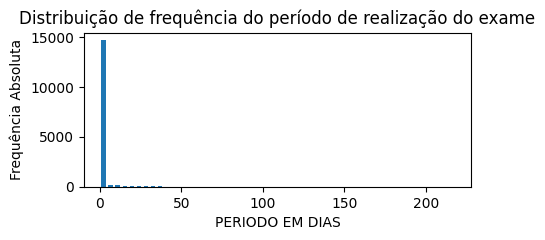

In [457]:
# Verificando o range de resultados
x = df_analise2['PERIODO']
plt.title('Distribuição de frequência do período de realização do exame')
plt.xlabel('PERIODO EM DIAS')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=50, rwidth=0.6)
plt.gcf().set_size_inches(5, 2) # alterar tamanho
#plt.rcParams['xtick.labelsize'] = 20
#plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 12})
plt.show()

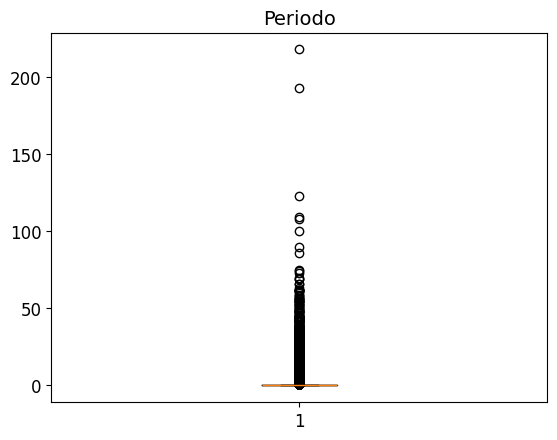

In [458]:
x = df_analise2['PERIODO']

plt.title("Periodo", size=14)
plt.boxplot(x)
plt.show()



---**negrito**

## EXAME A: COVID-19, anticorpos IGA e IGG, soro

'RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA'

In [459]:
df_analise2['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA'].unique()

array([nan, '2,47', '0,13', '0,79', '0,33', '0,77'], dtype=object)

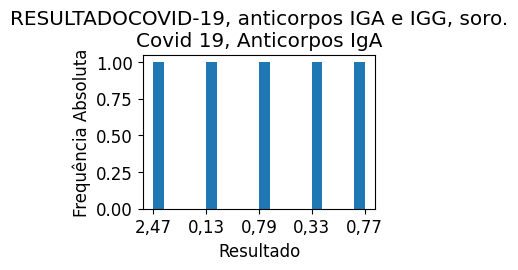

In [460]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA'])
x = x['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA']

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19, anticorpos IGA e IGG, soro.\nCovid 19, Anticorpos IgA')
plt.xlabel('Resultado')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=20, rwidth=2.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.rcParams.update({'font.size': 10})
plt.show()

COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação

In [461]:
df_analise2['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação'].unique()

array([nan,
       'Possível evidência sorológica de infecção recente por SARS-COV-2,',
       'Sem evidência sorológica de infecção por SARS-CoV-2,',
       'Sem evidência sorológica de infecção por SARS-COV-2,'],
      dtype=object)

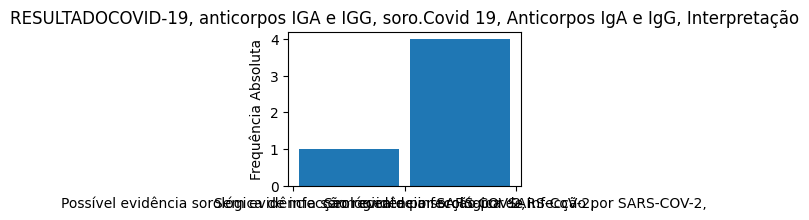

In [462]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação'])
x = x['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação']

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação')
#plt.xlabel('Resultado', fontsize=20)
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=2, rwidth=0.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.rcParams.update({'font.size': 10})
plt.show()

'RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação'

In [463]:
df_analise2['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação'].unique()

array([nan, 'REAGENTE', 'NÃO REAGENTE'], dtype=object)

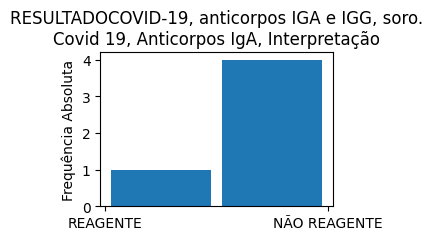

In [464]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação'])
x = x['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação']

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19, anticorpos IGA e IGG, soro.\nCovid 19, Anticorpos IgA, Interpretação')
#plt.xlabel('PERIODO EM DIAS')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=2, rwidth=0.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.rcParams.update({'font.size': 10})
plt.show()

'RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG'

In [465]:
df_analise2['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG'].unique()

array([nan, '0,69', '0,26', '0,39', '0,27', '0,13'], dtype=object)

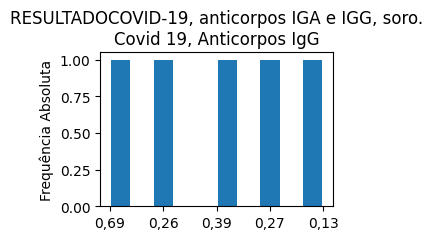

In [466]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG'])
x = x['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG']

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19, anticorpos IGA e IGG, soro.\nCovid 19, Anticorpos IgG')
#plt.xlabel('PERIODO EM DIAS')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=10, rwidth=0.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.rcParams.update({'font.size': 10})
plt.show()

COVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação

In [467]:
df_analise2['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação'].unique()

array([nan, 'NÃO REAGENTE'], dtype=object)

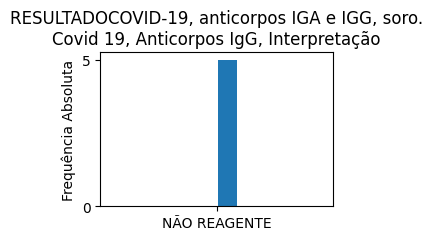

In [468]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação'])
x = x['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação']

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19, anticorpos IGA e IGG, soro.\nCovid 19, Anticorpos IgG, Interpretação')
#plt.xlabel('PERIODO EM DIAS')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=10, rwidth=0.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.rcParams.update({'font.size': 20})
plt.show()

 'RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, observação'

In [469]:
df_analise2['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, observação'].unique()

array([nan,
       'Em decorrência da possibilidade da falsa reatividade de IgA, sugere-se a repetição do teste em nova amostra colhida em 7 dias para verificar a soroconversão de IgG, aumentando assim o valor preditivo positivo do teste,',
       'Se persistir a hipótese diagnóstica, sugere-se, a critério médico, repetir o teste em nova amostra colhida em 7 dias,',
       'Se persistir a hipótese diagnóstica, sugere-se repetir o teste em nova amostra colhida em 7 dias,'],
      dtype=object)



---

## EXAME B: COVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury)

'RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)'

In [470]:
df_analise2['RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)'].unique()

array(['DETECTADO (POSITIVO)', nan, 'DETECTADO',
       'NÃO DETECTADO (NEGATIVO)', 'NÃO DETECTADO', 'DETECTÁVEL',
       'INDETECTÁVEL', 'Inconclusivo', 'INCONCLUSIVO'], dtype=object)

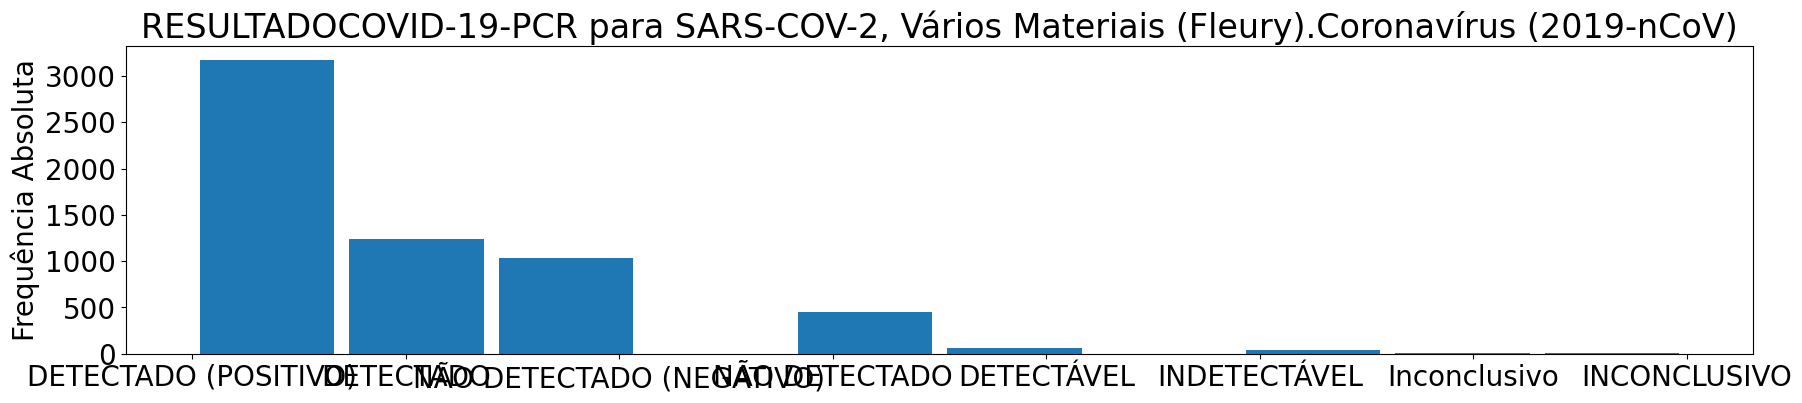

In [471]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)'])
x = x['RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)']

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)')
#plt.xlabel('PERIODO EM DIAS')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=10, rwidth=0.9)
plt.gcf().set_size_inches(21, 4) # alterar tamanho
plt.rcParams.update({'font.size': 10})
plt.show()

'RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Material (2019-nCoV) '

In [472]:
df_analise2['RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Material (2019-nCoV) '].unique()

KeyError: 'RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Material (2019-nCoV) '



---
## EXAME C: COVID-19-Sorologia IgM e IgG por quimiluminescência, soro


 'RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice'

In [ ]:
df_analise2['RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice'].unique()

array([nan, '0,7', '4,3', '18,5', '3,8', '0,6', '0,4', '0,5', '1,3',
       '0,3', '1,6', '0,9', '1,8', '0,8', '2,5', '1,0', '1,2', '2,4',
       '1,9', '6,3', '1,7', '4,8', '1,1', '4,1', '2,7', '3,9', '3,5',
       '1,4', '2,3', '0,2', '3,0', '5,6', '6,9', '2,2', '4,2', '2,1',
       '4,5', '3,2', '7,2', '6,1', '8,4', '5,0', '10,9', '6,5', '1,5',
       '6,8', '0,1', '6,4', '8,6', '9,2', '2,0', '5,2', '3,3', '13,2',
       '9,6', '2,9', '4,0', '4,9', '14,7', '30,0', '5,4'], dtype=object)

In [ ]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice'])
x = x['RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice'].tolist()

# trocando virgula por ponto
x = [(i.replace(',', '.'))for i in x]

#transforma str em float
x = [float(i) for i in x]



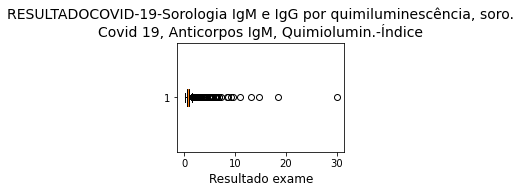

In [ ]:
plt.figure(figsize=(3,2))
bplots = plt.boxplot(x, vert = 0)
plt.title("RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.\nCovid 19, Anticorpos IgM, Quimiolumin.-Índice", size=14)
plt.xlabel('Resultado exame', size=12)
#plt.ylabel('TESTE', size=10)
plt.show()

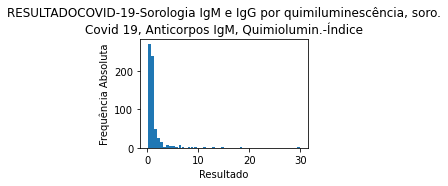

In [ ]:
# Verificando o range de resultados
plt.title('RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.\nCovid 19, Anticorpos IgM, Quimiolumin.-Índice')
plt.xlabel('Resultado')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=50, rwidth=0.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.rcParams.update({'font.size': 10})
plt.show()



---

## EXAME D: COVID-19-Teste Rápido (IgM e IgG), soro

COVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ


In [ ]:
df_analise2['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ'].value_counts()

A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, pode não haver anticorpos detectáveis (resultado negativo), inclusive em pessoas que tiveram infecção previamente confirmada por PCR, Se persistir a hipótese diagnóstica, sugere-se, a critério médico, repetir o teste em nova amostra colhida em 7 dias,;                                                                                                                      34
A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, o momento da soroconversão pode ser variável de indivíduo para indivíduo, podendo ser afetado pelo quadro clínico apresentado, O resultado sugere infecção com tempo de evolução inferior a 3 semanas, A capacidade protetora dos anticorpos da classe IgG não é completame

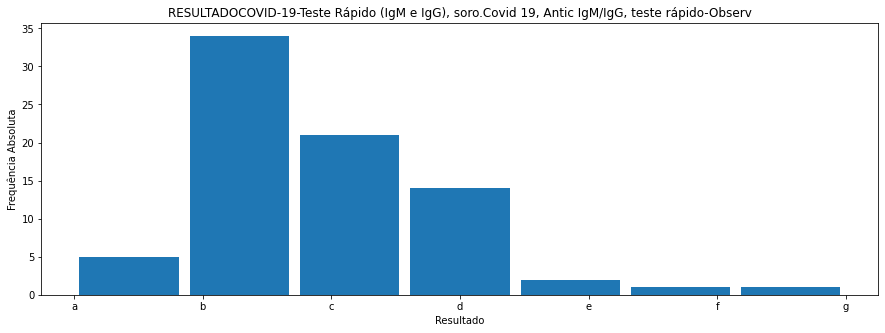

LEGENDA: 
a: A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, o momento da soroconversão pode ser variável de indivíduo para indivíduo, podendo ser afetado pelo quadro clínico apresentado, Em decorrência da possibilidade da falsa reatividade de IgM, sugere-se, a critério médico, a repetição do teste em nova amostra colhida em 7 dias para verificar a soroconversão de IgG, aumentando assim o valor preditivo positivo do teste,;
b: A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, pode não haver anticorpos detectáveis (resultado negativo), inclusive em pessoas que tiveram infecção previamente confirmada por PCR, Se persistir a hipótese diagnóstica, sugere-se, a critério médico, repetir o teste em nova amostra colhida em 7 dias,;
c: A

In [ ]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ'])
x = x['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ'].tolist()

y = []
for i in x:
  if ( i == 'A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, o momento da soroconversão pode ser variável de indivíduo para indivíduo, podendo ser afetado pelo quadro clínico apresentado, Em decorrência da possibilidade da falsa reatividade de IgM, sugere-se, a critério médico, a repetição do teste em nova amostra colhida em 7 dias para verificar a soroconversão de IgG, aumentando assim o valor preditivo positivo do teste,;' ):
    y.append('a')
  elif ( i == 'A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, pode não haver anticorpos detectáveis (resultado negativo), inclusive em pessoas que tiveram infecção previamente confirmada por PCR, Se persistir a hipótese diagnóstica, sugere-se, a critério médico, repetir o teste em nova amostra colhida em 7 dias,;' ):
    y.append('b')
  elif ( i == 'A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, o momento da soroconversão pode ser variável de indivíduo para indivíduo, podendo ser afetado pelo quadro clínico apresentado, O resultado sugere infecção com tempo de evolução inferior a 3 semanas, A capacidade protetora dos anticorpos da classe IgG não é completamente estabelecida,;' ):
    y.append('c')
  elif ( i == 'A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, o momento da soroconversão pode ser variável de indivíduo para indivíduo, podendo ser afetado pelo quadro clínico apresentado, O resultado sugere que já tenham transcorrido mais de 3 semanas desde a infecção aguda, A capacidade protetora dos anticorpos da classe IgG não é completamente estabelecida,;'):
    y.append('d')
  elif ( i == 'Se persistir a hipótese diagnóstica, sugere-se repetir o teste em nova amostra colhida em 7 dias,;'):
    y.append('e')
  elif ( i == 'O seguimento sorológico ficará a critério do médico assistente,;' ):
    y.append('f')
  elif ( i == 'O resultado sugere que já tenham transcorrido mais de 3 semanas da infecção aguda, A capacidade protetora dos anticorpos da classe IgG não é completamente estabelecida,;' ):
    y.append('g')

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ')
plt.xlabel('Resultado')
plt.ylabel('Frequência Absoluta')
plt.hist(y, bins=7, rwidth=0.9)
plt.gcf().set_size_inches(15, 5) # alterar tamanho
plt.rcParams.update({'font.size': 10})
plt.show()

# Legenda:

print('LEGENDA: ')

print( 'a: A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, o momento da soroconversão pode ser variável de indivíduo para indivíduo, podendo ser afetado pelo quadro clínico apresentado, Em decorrência da possibilidade da falsa reatividade de IgM, sugere-se, a critério médico, a repetição do teste em nova amostra colhida em 7 dias para verificar a soroconversão de IgG, aumentando assim o valor preditivo positivo do teste,;' )

print( 'b: A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, pode não haver anticorpos detectáveis (resultado negativo), inclusive em pessoas que tiveram infecção previamente confirmada por PCR, Se persistir a hipótese diagnóstica, sugere-se, a critério médico, repetir o teste em nova amostra colhida em 7 dias,;' )

print( 'c: A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, o momento da soroconversão pode ser variável de indivíduo para indivíduo, podendo ser afetado pelo quadro clínico apresentado, O resultado sugere infecção com tempo de evolução inferior a 3 semanas, A capacidade protetora dos anticorpos da classe IgG não é completamente estabelecida,;' )

print( 'd: A dinâmica de produção de anticorpos na COVID-19 ainda não é bem estabelecida, especialmente em pacientes que não apresentaram sintomas ou apresentaram quadro leve, Nesse sentido, o momento da soroconversão pode ser variável de indivíduo para indivíduo, podendo ser afetado pelo quadro clínico apresentado, O resultado sugere que já tenham transcorrido mais de 3 semanas desde a infecção aguda, A capacidade protetora dos anticorpos da classe IgG não é completamente estabelecida,;')

print( 'e: Se persistir a hipótese diagnóstica, sugere-se repetir o teste em nova amostra colhida em 7 dias,;')

print( 'f: O seguimento sorológico ficará a critério do médico assistente,;' )

print( 'g: O resultado sugere que já tenham transcorrido mais de 3 semanas da infecção aguda, A capacidade protetora dos anticorpos da classe IgG não é completamente estabelecida,;' )



COVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido

In [ ]:
df_analise2['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido'].value_counts()

NÃO REAGENTE    42
REAGENTE        36
Name: RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido, dtype: int64

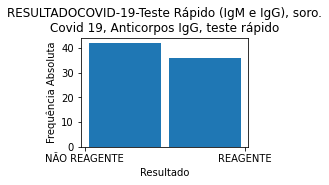

In [ ]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido'])
x = x['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido'].tolist()

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.\nCovid 19, Anticorpos IgG, teste rápido')
plt.xlabel('Resultado')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=2, rwidth=0.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.show()

RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgM, teste rápido

In [ ]:
df_analise2['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgM, teste rápido'].value_counts()

NÃO REAGENTE    52
REAGENTE        26
Name: RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgM, teste rápido, dtype: int64

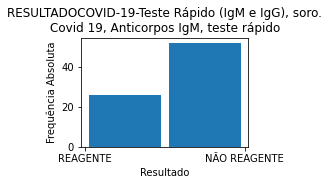

In [ ]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgM, teste rápido'])
x = x['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgM, teste rápido'].tolist()

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.\nCovid 19, Anticorpos IgM, teste rápido')
plt.xlabel('Resultado')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=2, rwidth=0.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.show()

COVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Material


In [ ]:
df_analise2['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Material'].value_counts()

plasma    42
soro       8
Name: RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Material, dtype: int64

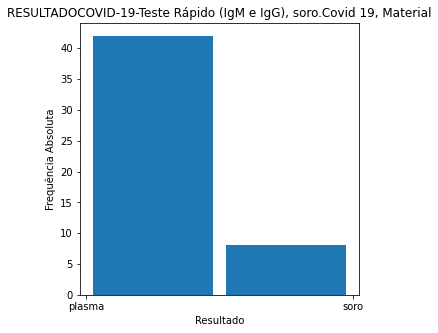

In [ ]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Material'])
x = x['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Material'].tolist()

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Material')
plt.xlabel('Resultado')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=2, rwidth=0.9)
plt.gcf().set_size_inches(5, 5) # alterar tamanho
plt.show()

COVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret


In [ ]:
df_analise2['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret'].value_counts()

Sem evidência sorológica de infecção por SARS-CoV-2,                 36
Evidência sorológica de infecção recente por SARS-CoV-2,             21
Evidência sorológica de infecção pregressa por SARS-CoV-2,           15
Possível evidência sorológica de infecção recente por SARS-CoV-2,     5
Name: RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret, dtype: int64

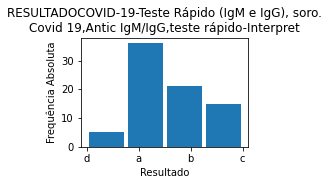

LEGENDA: 
a: Sem evidência sorológica de infecção por SARS-CoV-2
b: Evidência sorológica de infecção recente por SARS-CoV-2
c: Evidência sorológica de infecção pregressa por SARS-CoV-2
d: Possível evidência sorológica de infecção recente por SARS-CoV-2


In [ ]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret'])
x = x['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret'].tolist()

y = []
for i in x:
  if ( i == 'Sem evidência sorológica de infecção por SARS-CoV-2,' ):
    y.append('a')
  elif ( i == 'Evidência sorológica de infecção recente por SARS-CoV-2,' ):
    y.append('b')
  elif ( i == 'Evidência sorológica de infecção pregressa por SARS-CoV-2,' ):
    y.append('c')
  elif ( i == 'Possível evidência sorológica de infecção recente por SARS-CoV-2,'):
    y.append('d')

# Verificando o range de resultados
plt.title('RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.\nCovid 19,Antic IgM/IgG,teste rápido-Interpret')
plt.xlabel('Resultado')
plt.ylabel('Frequência Absoluta')
plt.hist(y, bins=4, rwidth=0.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.show()

print("LEGENDA: ")
print('a: Sem evidência sorológica de infecção por SARS-CoV-2')
print('b: Evidência sorológica de infecção recente por SARS-CoV-2')
print('c: Evidência sorológica de infecção pregressa por SARS-CoV-2')
print('d: Possível evidência sorológica de infecção recente por SARS-CoV-2')



---
## EXAME E: Sars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais




Covid 19, Detecção por PCR

In [ ]:
df_analise2['RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Detecção por PCR'].value_counts()

NÃO DETECTADO (NEGATIVO)    5
DETECTADO (POSITIVO)        3
Name: RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Detecção por PCR, dtype: int64

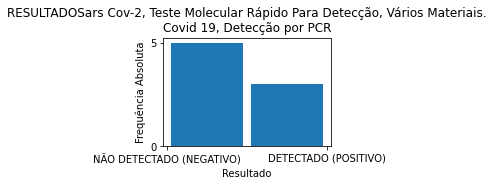

In [ ]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Detecção por PCR'])
x = x['RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Detecção por PCR'].tolist()

# Verificando o range de resultados
plt.title('RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.\nCovid 19, Detecção por PCR')
plt.xlabel('Resultado')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=2, rwidth=0.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.rcParams.update({'font.size': 25})
plt.show()

In [ ]:
df_analise2['RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Material'].value_counts()

raspado de material do trato respiratório superior    7
aspirado de nasofaringe                               1
Name: RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Material, dtype: int64



---
## EXAME F: Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica)


Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica)

In [ ]:
df_analise2['RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica)'].value_counts()

DETECTADO    4777
Name: RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica), dtype: int64

In [ ]:
df_analise2['RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica)'].unique()

array([nan, 'DETECTADO'], dtype=object)

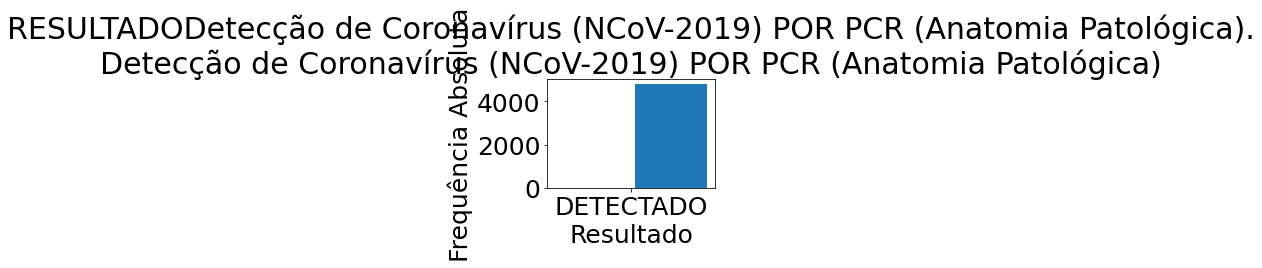

In [ ]:
# Eliminando valores nulos
x = df_analise2.dropna(subset=['RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica)'])
x = x['RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica)'].tolist()

# Verificando o range de resultados
plt.title('RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).\nDetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica)')
plt.xlabel('Resultado')
plt.ylabel('Frequência Absoluta')
plt.hist(x, bins=2, rwidth=0.9)
plt.gcf().set_size_inches(3, 2) # alterar tamanho
plt.rcParams.update({'font.size': 10})
plt.show()

# 4.0 - CLASSIFICAÇÃO COVID-19 POSITIVO OU NEGATIVO

In [ ]:
# cópia profunda do dataframe para df4
df4 = df_analise2.copy(deep=True)

# Função para verificar se uma variável é NaN
def isNaN(num):
  return num != num

# Função para transformar "Exame C" de str para float
def prepara(x):
  coluna = 'RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice'
  var = x[coluna]
  if ( isNaN(var) ):
    valor = var
  else:
    valor = var.replace(",", ".")
    valor = float(valor)
  return valor

exame_c = 'RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice'
df4[exame_c] = df4.apply( lambda row : prepara(row), axis = 1)
df4[exame_c].unique()

array([ nan,  0.7,  0.2,  4.3, 18.5,  3.8, 13.7,  1.2,  0.6,  0.4,  0.5,
        1.3,  0.1,  0.3,  1.6,  0.9,  1.8,  0.8,  2.5,  1. , 10.8,  2.4,
        2. ,  1.9,  6.3,  1.7,  1.1,  2.2,  4.1,  1.4,  2.7,  5.7,  3.9,
        3.5,  5. , 69.7,  1.5,  2.3,  6. , 15. ,  3.6,  3. ,  5.6,  6.9,
        4.2,  2.1,  4.5,  3.2,  7.2,  6.1,  8.4, 19.7, 10.2,  2.9,  7.3,
       15.2,  2.6,  7.6, 30.4,  6.5, 10.9,  3.4,  5.9,  8. ,  3.1, 14.4,
        6.7,  6.8,  5.3,  6.4, 12.7,  6.6, 24.5,  7. ,  4.6, 28.4,  8.6,
        9.2,  2.8,  3.3,  5.2, 13.2,  7.7,  9.6,  4. ,  4.9, 14.7,  4.8,
       21.9,  4.7,  9.4,  5.5, 30. ,  5.4,  4.4,  5.1, 12. ])

In [ ]:
# COVID
def covid(x):

    #starting score
    resultado = 0

    #filtros

    #Exame a
    filtro1 = (x['RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação'] == "REAGENTE")

    #Exame b
    filtro2 = (x['RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)'] == 'DETECTADO (POSITIVO)')
    filtro3 = (x['RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)'] == 'DETECTADO' )

    #Exame c
    filtro4 = (x['RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice']>= 0.8)

    #Exame d
    filtro5 = (x['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret']=='Evidência sorológica de infecção recente por SARS-CoV-2,')
    filtro6 = (x['RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret']=='Possível evidência sorológica de infecção recente por SARS-CoV-2,')

    #Exame e
    filtro7 = (x['RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Detecção por PCR']=='DETECTADO (POSITIVO)')

    #Exame f
    filtro8 = (x['RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica)']=='DETECTADO')

    #condicional
    if (filtro2 or filtro3 or filtro8):
        resultado = 1
    else:
        resultado = 0

    return resultado

df4['COVID'] = np.nan

#chama covid()
df4['COVID'] = df4.apply( lambda row : covid(row), axis = 1)

print("Positivo: ", df4[df4['COVID']==1].shape )

print("Negativo: ", df4[df4['COVID']==0].shape )

df4[df4['COVID']==1].head(3)



Positivo:  (14369, 19)
Negativo:  (1187, 19)


,PACIENTE,PERIODO,"RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA e IgG, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgA, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, Anticorpos IgG, Interpretação","RESULTADOCOVID-19, anticorpos IGA e IGG, soro.Covid 19, observação","RESULTADOCOVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury).Coronavírus (2019-nCoV)","RESULTADOCOVID-19-Sorologia IgM e IgG por quimiluminescência, soro.Covid 19, Anticorpos IgM, Quimiolumin.-Índice","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Antic IgM/IgG, teste rápido-Observ","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgG, teste rápido","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Anticorpos IgM, teste rápido","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19, Material","RESULTADOCOVID-19-Teste Rápido (IgM e IgG), soro.Covid 19,Antic IgM/IgG,teste rápido-Interpret",RESULTADODetecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica).Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica),"RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Detecção por PCR","RESULTADOSars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais.Covid 19, Material",COVID
0,000150DB429AFF026ECD130B0A076CEF,0.0,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO (POSITIVO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,00017961865C4F766FDBB3CD8FE0BFB0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO,NaN,NaN,1
2,0003B368F65004E14332CD44BEE6E600,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DETECTADO,NaN,NaN,1


## Agrupamento por paciente

In [ ]:
# fazendo agrupamento por PACIENTE, pois alguns pacientes fizeram mais de um exame
df_covid = df4.groupby( ['PACIENTE'] ).agg( { 'COVID':['sum'] } ).reset_index()

#solucionando nome colunas dois niveis
df_covid.columns = [ '_'.join(x) for x in df_covid.columns ]
df_covid.columns=['PACIENTE', 'COVID']
df_covid.to_excel('df_covid.xlsx')

# prints
print("Positivo: ")
print(df_covid[df_covid['COVID']>0].shape)
print('\nNegativo: ')
print(df_covid[df_covid['COVID']==0].shape)

Positivo: 
(13871, 2)

Negativo: 
(730, 2)


In [ ]:
# Alterando rotulo de 1 para 'POSITIVO' e de 0 para 'NEGATIVO'

# saida
def saida(x):

    #condicional
    if (x['COVID']>0):
        resultado = 'POSITIVO'
    else:
        resultado = 'NEGATIVO'

    return resultado

#chama saida()
df_covid['COVID'] = df_covid.apply( lambda row : saida(row), axis = 1)


# prints
print("Positivo: ")
print(df_covid[df_covid['COVID']=='POSITIVO'].shape)
print('\nNegativo: ')
print(df_covid[df_covid['COVID']=='NEGATIVO'].shape)

df_covid

Positivo: 
(13871, 2)

Negativo: 
(730, 2)


,PACIENTE,COVID
0,000150DB429AFF026ECD130B0A076CEF,POSITIVO
1,00017961865C4F766FDBB3CD8FE0BFB0,POSITIVO
2,0003B368F65004E14332CD44BEE6E600,POSITIVO
3,000F0BC139D2846DB86AA32B8F05B215,POSITIVO
4,00177290279939FB33386B29198C450E,POSITIVO
...,...,...
14596,FFE724271952607EE4DA68C847297386,POSITIVO
14597,FFEC3898BAA04751EB00C108270B8F7E,NEGATIVO
14598,FFEE2A236442ECF6D9042F39A8EA73FD,POSITIVO
14599,FFF5753408C98D5E0218931420B6AF85,POSITIVO


## Histograma Positivo / Negativo

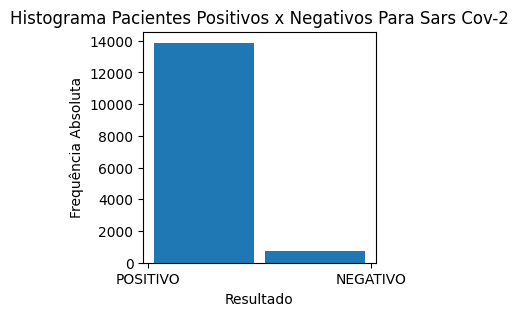

Positivo: 
(13871, 2)

Negativo: 
(730, 2)


In [ ]:
plt.title('Histograma Pacientes Positivos x Negativos Para Sars Cov-2')
plt.xlabel('Resultado')
plt.ylabel('Frequência Absoluta')
plt.hist(df_covid['COVID'], bins=2, rwidth=0.9)
plt.gcf().set_size_inches(3, 3) # alterar tamanho
plt.rcParams.update({'font.size': 10})
plt.show()


# prints
print("Positivo: ")
print(df_covid[df_covid['COVID']=='POSITIVO'].shape)
print('\nNegativo: ')
print(df_covid[df_covid['COVID']=='NEGATIVO'].shape)


In [474]:
%cd /home/filipe/Documentos/GitHub/HCAI_prediction/DatasetConstruction/

%ls

/home/filipe/.local/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/filipe/Documentos/GitHub/HCAI_prediction/DatasetConstruction
Covid_exploratory_analysis.ipynb  exames_COVID19_todos.xlsx
Datasets_construction.ipynb       exames_infeccoes.xlsx
exames_COVID19_considerados.xlsx


In [478]:
lista_covid_positivo = df_covid[df_covid['COVID']=='POSITIVO']

#lista_covid_positivo = lista_covid_positivo['PACIENTE'].unique()

print(lista_covid_positivo.shape)

lista_covid_positivo.to_excel('lista_covid_positivo.xlsx')


(13871, 2)
